In [30]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision
import sys
sys.path.append("../QualityAssessor/")
import utils
import functools
import numpy as np

%matplotlib inline

In [6]:
nf = 64
nz = 990
batchSize = 64

In [8]:
trainloader, testloader, n_class = utils.load_dataset('mnist', '../data', batchSize, 28, 2, -1)

Files already downloaded
Files already downloaded


In [35]:
conv1 = nn.Conv2d(1, 128, 3)
convt1 = nn.ConvTranspose2d(128, 1, 3)

In [36]:
conv1.weight = convt1.weight

In [37]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

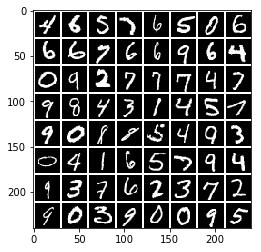

In [38]:
imshow(torchvision.utils.make_grid(images))

In [39]:
images_2 = convt1(conv1(Variable(images)))

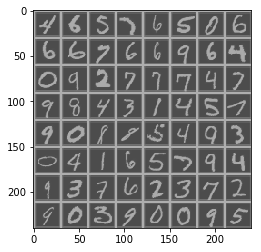

In [41]:
imshow(torchvision.utils.make_grid(images_2.data))

In [42]:
images_2[0]

Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
  -0.0866 -0.1987 -0.3097 -0.3097 -0.3097 -0.3097 -0.3097 -0.3097 -0.3097
 -0.0541 -0.2287 -0.2627 -0.2627 -0.2627 -0.2627 -0.2627 -0.2627 -0.2627
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3969
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3971
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3970 -0.3999
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3970 -0.3970 -0.3969 -0.3978 -0.4031
 -0.0558 -0.3141 -0.3970 -0.3970 -0.3972 -0.3977 -0.3997 -0.4028 -0.4044


In [44]:
images[0]


(0 ,.,.) = 

Columns 0 to 8 
  -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000
 -1.0000 -1.0000 -1.

In [48]:
a = torch.FloatTensor(1000).normal_(0, 1)